In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

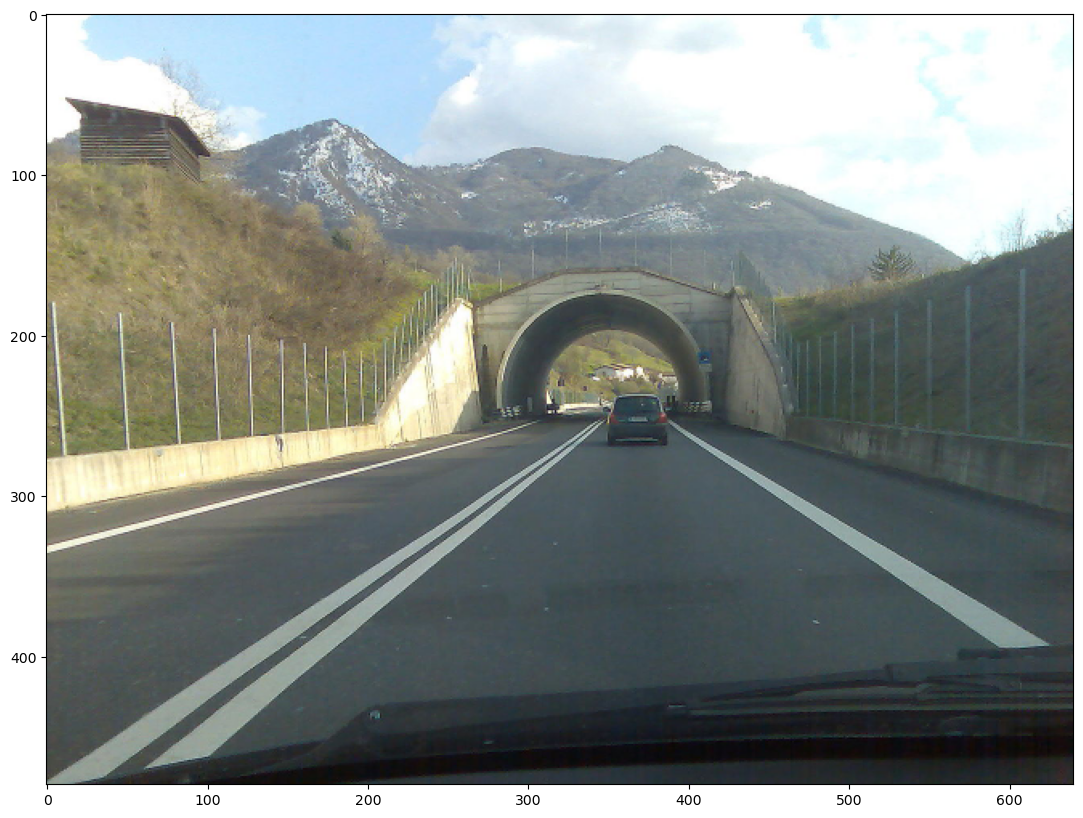

In [2]:
img = cv2.imread('desktop/dashcam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(img)

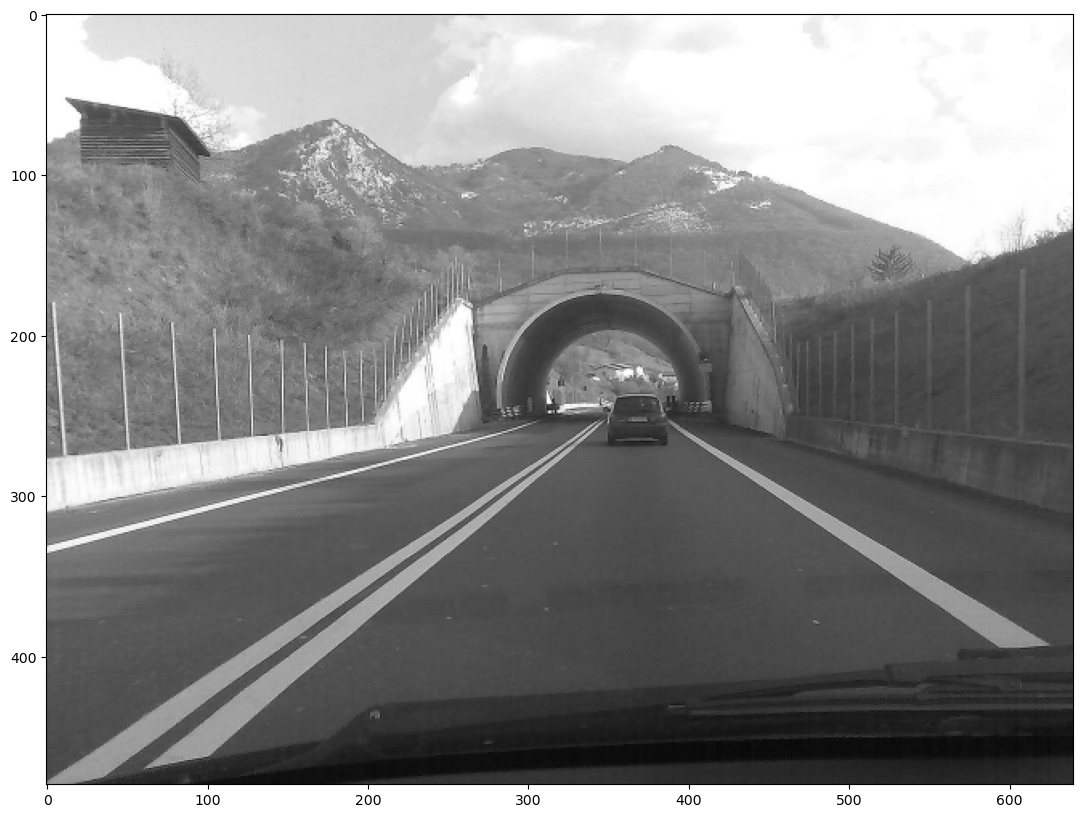

In [3]:
# Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

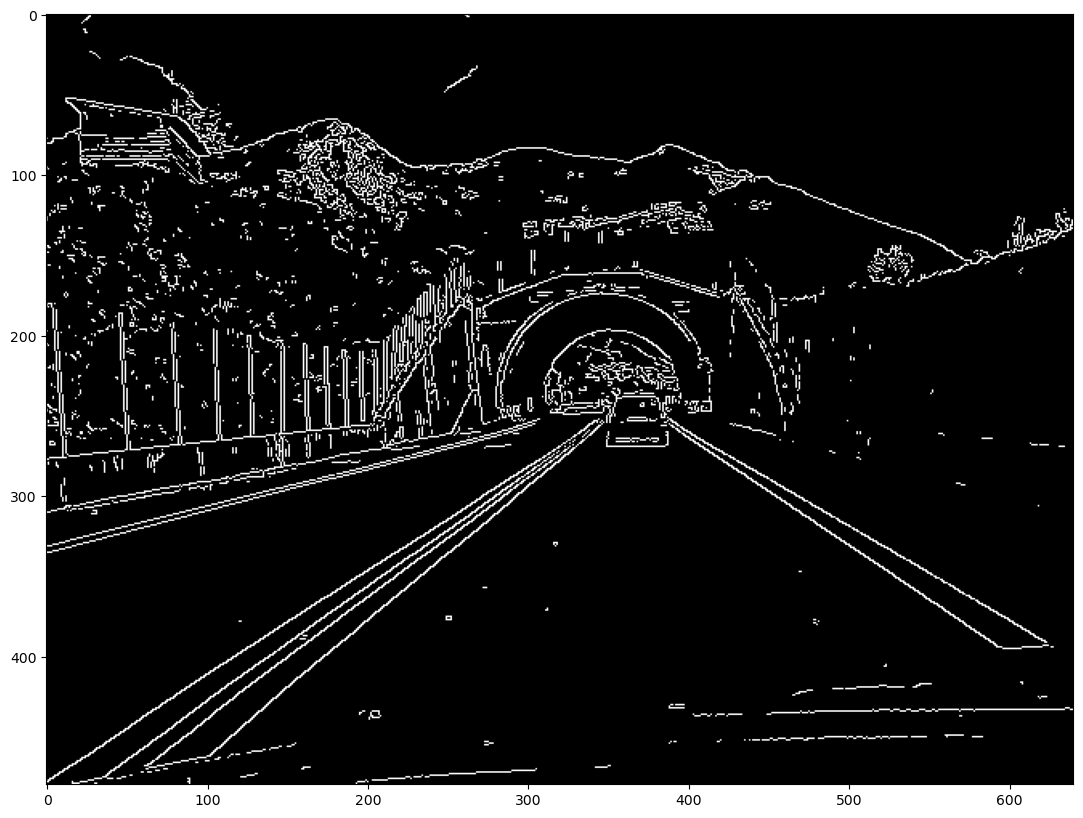

In [4]:
# Obtain edge map

edges = cv2.Canny(gray, threshold1=100, threshold2=120)
plt.imshow(edges, cmap='gray')

(<AxesSubplot: title={'center': 'Edge map'}>,
 Text(0.5, 1.0, 'Edge map'))

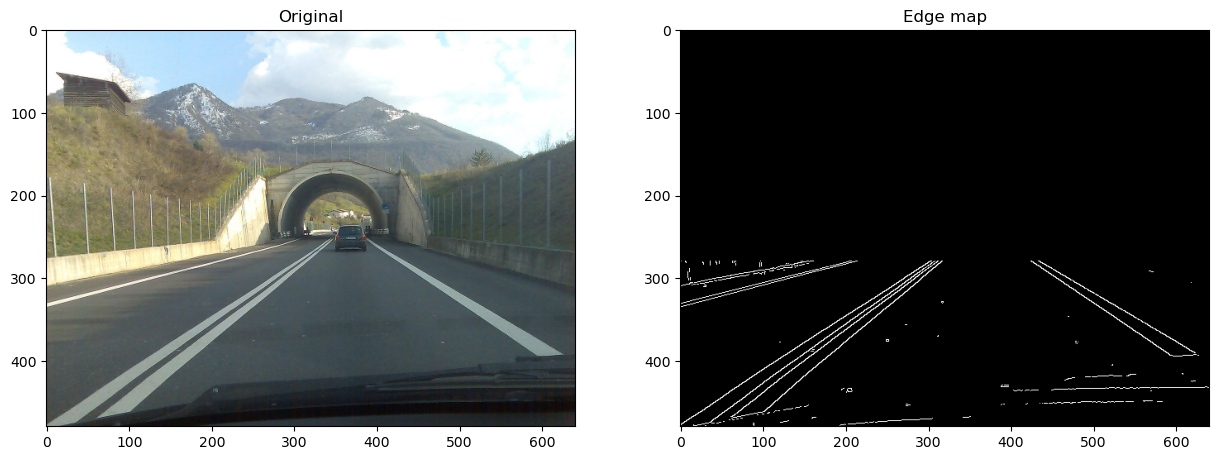

In [5]:
# We are only interseted in the road so we will remove everything above the horizon
edges[0:280] = 0

# Let's plot the images
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge map')

(<AxesSubplot: title={'center': 'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

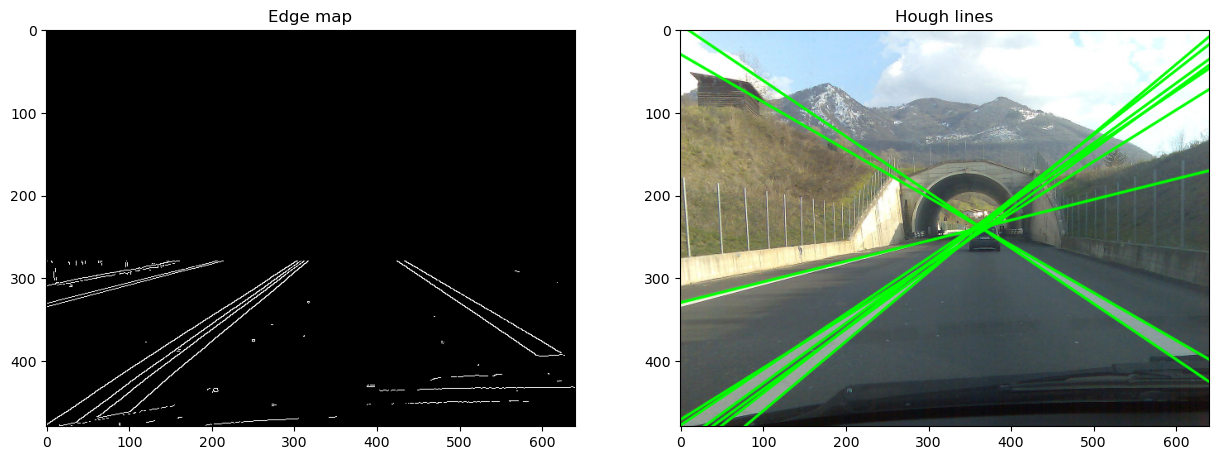

In [6]:
# Apply Hough transform to parametrize the lines
# Hint 1: Offset resolution of 2 pixels and slope resolution of 2 degrees work well in this case
# Hint 2: A suitable value for the accumulator threshold is 190
# Apply Hough transform to parametrize the lines
# Hint 1: Offset resolution of 2 pixels and slope resolution of 2 degrees work well in this case
# Hint 2: A suitable value for the accumulator threshold is 190

lines = cv2.HoughLines(edges, rho=1, theta=2*np.pi/180, threshold=120) 
# Let's get rid of the unnecessary dimension
lines = lines[:, 0, :]
# Plot the resulting Hough lines
result = np.copy(img)

     
for line in lines:
    rho = line[0]
    theta = line[1]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, (0,255,0) , 2, cv2.LINE_AA)
    
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')


(<AxesSubplot: title={'center': 'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

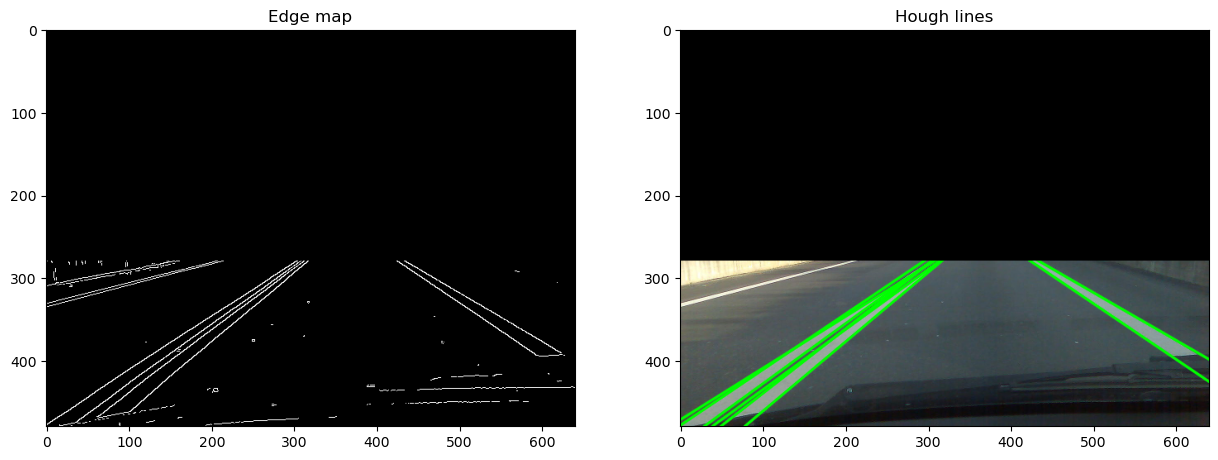

In [7]:
# Filter out all lines that are approximately horizontal (+/- 20 degrees). 
filtered_lines = []
for line in lines:
    # Extract theta for current line (remember Hough works with radians)
    theta = line[1]
    # Keep line if theta is not horizontal
    if abs(theta - np.pi/2) > np.deg2rad(20):
        filtered_lines.append(line)
   
        
# Let's plot the resulting filtered lines
result = np.copy(img)

for line in filtered_lines:
    rho = line[0]
    theta = line[1]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, (0,255,0), 2, cv2.LINE_AA)
    result[0:280] = 0

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')

C:\UCHEBA\envs\zrbn\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


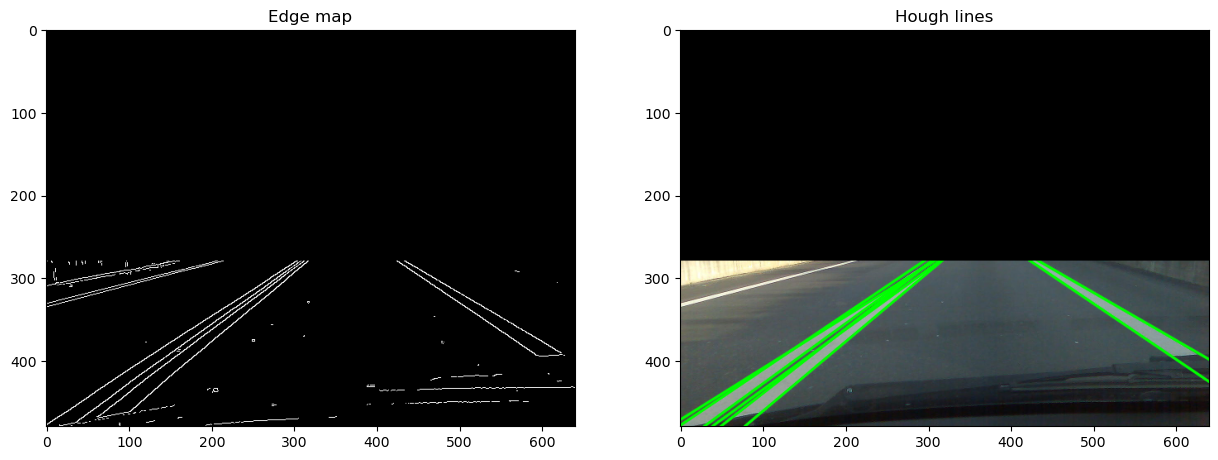

In [8]:
# We will apply k-means clustering to refine the detected lines.
# Don't worry, we will learn about the clustering later in the course :-)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, n_init="auto").fit(filtered_lines)
kmeans.cluster_centers_

# Again, let's plot the resulting filtered lines
result = np.copy(img)
    
for line in kmeans.cluster_centers_:
    
    rho = line[0]
    theta = line[1]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, (0,255,0), 2, cv2.LINE_AA)
    result[0:280] = 0
    plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
    plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')


In [9]:
Questions
1)Do you see anything strange in the final result?
No, nothing changed in all, but at this point of my knowledge i can predict that i did something wrong and thats why my result
looks like this :)

2)Do you think the Hough transform resolution is important for obtaining a good result? Why?
I think that the resolution of the Hough transform is not important to get a good result, because before applying the Hough tran
sform to parametrize the lines in our image, we find the edge map and we can adjust with the trash hold how detailed we want
to see the boundaries of the objects in the photo

3)Do you think the Hough transform accumulator threshold is important for obtaining a good result? Why?
Yes, the threshold of the Hough transform accumulator is very important, because using different values of this parameter allows
us to adjust the number of Hough lines, thereby leaving only the lines that are important for the task we are solving, removing 
the excess

SyntaxError: invalid syntax (1675923601.py, line 3)